In [54]:
from PIL import Image,ImageFilter , ImageOps, ImageDraw
import glob
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure

In [55]:
PATH='TaraData/exportimg_160_20180423_0936/'
PATH_TRAIN='TaraData/train_group_prune/'
PATH_TEST='TaraData/test_group_prune/'
PATH_TMP='TaraData/tempFolders/'
PATH_TSV='TaraData/export_160_20180423_0931/'
PATH_MASK='TaraData/contour/'
PATH_MASK_TRAIN='TaraData/mask/train_group'
PATH_MASK_TEST='TaraData/mask/test_group'

In [3]:
glob.glob(PATH_TSV+'/*.TSV')

[]

In [3]:
data=[]
for dire in glob.glob(PATH_TSV+'/*.TSV'):
    print(dire)
    data1=pd.read_csv(dire,delimiter='\t',encoding = "ISO-8859-1",header=0,low_memory=False,index_col=None)
    data1=data1.drop(0)
    data.append(data1)

#data1= pd.read_csv(PATH+'/labels/TARA_G100010173.tsv',delimiter='\t',encoding = "ISO-8859-1",header=0,low_memory=False)
#data1=data1.drop(0)
#data2= pd.read_csv(PATH+'/labels/TARA_G100010893.tsv',delimiter='\t',encoding = "ISO-8859-1",header=0,low_memory=False)

In [ ]:
frame = pd.concat(data, ignore_index=True)

In [5]:
frame

object_id object_lat  \
0       S123--D0--R27--G100010173--A140624--P70917--L0...    -8.8984   
1       S123--D0--R27--G100010173--A130822--P70917--L0...    -8.8984   
2       S123--D0--R27--G100010173--A140624--P70917--L0...    -8.8984   
3       S123--D0--R27--G100010173--A140624--P70917--L0...    -8.8984   
4       S123--D0--R27--G100010173--A140624--P70917--L0...    -8.8984   
5       S123--D0--R27--G100010173--A140624--P70917--L0...    -8.8984   
6       S123--D0--R27--G100010173--A130822--P70917--L0...    -8.8984   
7       S123--D0--R27--G100010173--A140624--P70917--L0...    -8.8984   
8       S123--D0--R27--G100010173--A130822--P70917--L0...    -8.8984   
9       S123--D0--R27--G100010173--A130822--P70917--L0...    -8.8984   
10      S123--D0--R27--G100010173--A130822--P70917--L0...    -8.8984   
11      S123--D0--R27--G100010173--A130822--P70917--L0...    -8.8984   
12      S123--D0--R27--G100010173--A140624--P70917--L0...    -8.8984   
13      S123--D0--R27--G100010173--A140624--P70917--L0...    -8.8984   
14      S123--D0--R27--G100010173--A130822--P70917--L0...    -8.8984   
15      S123--D0--R27--G100010173--A140624--P70917--L0...    -8.8984   
16      S123--D0--R27--G100010173--A130822--P70917--L0...    -8.8984   
17      S123--D0--R27--G100010173--A130822--P70917--L0...    -8.8984   
18      S123--D0--R27--G100010173--A140624--P70917--L0...    -8.8984   
19      S123--D0--R27--G100010173--A130822--P70917--L0...    -8.8984   
20      S123--D0--R27--G100010173--A140624--P70917--L0...    -8.8984   
21      S123--D0--R27--G100010173--A130822--P70917--L0...    -8.8984   
22      S123--D0--R27--G100010173--A140624--P70917--L0...    -8.8984   
23      S123--D0--R27--G100010173--A130822--P70917--L0...    -8.8984   
24      S123--D0--R27--G100010173--A130822--P70917--L0...    -8.8984   
25      S123--D0--R27--G100010173--A140624--P70917--L0...    -8.8984   
26      S123--D0--R27--G100010173--A140624--P70917--L0...    -8.8984   
27      S123--D0--R27--G100010173--A140624--P70917--L0...    -8.8984   
28      S123--D0--R27--G100010173--A130822--P70917--L0...    -8.8984   
29      S123--D0--R27--G100010173--A140624--P70917--L0...    -8.8984   
...                                                   ...        ...   
104955  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104956  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104957  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104958  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104959  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104960  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104961  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104962  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104963  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104964  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104965  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104966  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104967  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104968  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104969  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104970  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104971  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104972  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104973  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104974  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104975  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104976  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104977  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104978  S128--D1--R27--G100010893--A131204--P70917--L0...      0.001   
104979  S128--D1

In [6]:
dates=frame['object_date'].astype("datetime64")
lats=frame['object_lat']
lons=frame['object_lon']

In [7]:
plt.figure(figsize=(20, 10))
color='#494949'
ax = (dates.groupby(dates.dt.month)
                     .count()).plot(kind="bar", color=color)
ax.set_facecolor('#eeeeee')
ax.set_xlabel("month")
ax.set_ylabel("count")
ax.set_title("observations in 2011")
plt.show()

In [8]:
classes=data1["object_annotation_category"]
objectsid=data1["object_id"]

unique_classes=classes.unique()

# Different Classes

In [9]:
for num, name in enumerate(unique_classes, start=1):
    print("Class {}: {}".format(num, name))

Class 1: Amoebozoa
Class 2: Dictyocha
Class 3: Gymnodiniales
Class 4: Navicula
Class 5: fiber
Class 6: feces
Class 7: multiple
Class 8: bubble
Class 9: large
Class 10: small
Class 11: htm01
Class 12: htm02
Class 13: clumps
Class 14: Chaetoceros broken
Class 15: Chaetoceros chain
Class 16: Chaetoceros single
Class 17: Pseudo-Nitzschia chain
Class 18: Pseudo-Nitzschia single
Class 19: Nitzschia chain
Class 20: cyano clump
Class 21: cyst 1
Class 22: cyst 2
Class 23: cyst 3
Class 24: cyst 4
Class 25: cyst 5
Class 26: Coccolithes
Class 27: Setae Corethron
Class 28: Setae
Class 29: Cerataulina 2 temp
Class 30: Asterolamprales temp
Class 31: centric 2 temp
Class 32: centric 3 temp
Class 33: centric 4 temp
Class 34: centric 7 temp
Class 35: centric 8 temp
Class 36: centric 9 temp
Class 37: centric 10 temp
Class 38: centric 12 temp
Class 39: centric 14 temp
Class 40: pennate 1 temp
Class 41: pennate 3 temp
Class 42: pennate 5 temp
Class 43: pennate 6 temp
Class 44: pennate 8 temp
Class 45: penn

## We have 110 Different Classes

In [10]:
data1['object_id'][1]

'S128--D1--R27--G100010893--A131204--P70917--L01738'

# Image Preview

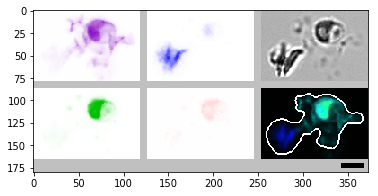

In [4]:
%matplotlib inline 
from PIL import Image

im= Image.open(PATH+"/autotroph_auto 1 temp/10846916_S127--D0--R27--G100010824--A131203--L03553--max.png")
import matplotlib.pyplot as plt
fig = plt.figure()
plt.imshow(im)
plt.show()
image=im

In [5]:
import os
from tqdm import tqdm
def parse_title(title=""):
    filename, file_extension = os.path.splitext(title)
    dir_name= os.path.dirname(title)
    cl=os.path.basename(dir_name)
    ob_id= os.path.basename(filename)
    parts=filename.split("-")
    t_o=ob_id.replace(parts[-1]," ")
    title="Class: ",cl," Type Image: ",parts[-1]," Object:id", ob_id
    return title
print(parse_title())


('Class: ', '', ' Type Image: ', '', ' Object:id', '')


In [6]:
from PIL import Image, ImageChops

def showimages(six_images,title="Images"):
    if title!="Images":
        title=parse_title(title)
    f, axarr = plt.subplots(2, 3)
    axarr[0, 0].imshow(six_images[0])
    axarr[0, 0].set_title(title)
    axarr[1, 0].imshow(six_images[1])
    axarr[0, 1].imshow(six_images[2])
    axarr[1, 1].imshow(six_images[3])
    axarr[0, 2].imshow(six_images[4])
    axarr[1, 2].imshow(six_images[5])
        
def check_borders(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    bbox = diff.getbbox()
    if not bbox:
        return im
    return im.crop(bbox)
  
def crop6(im):
    number_of_cols=3
    W=im.width
    H=im.height
    w=(W-16)/3
    h=(H-24)/2
    images=[]
    w1=0
    w2=w
    for i in range(number_of_cols):
        im1=im.crop((w1, 0, w2, h))
        images.append(im1)
        im1=im.crop((w1, h+8, w2, 2*h+8))
        images.append(im1)
        w1=w2+8
        w2=w2+w+8
    return images

# Crop Images

In [7]:
six_images=crop6(image)


# Show Images

In [8]:
showimages(six_images,"title 1")

# All images in a Diretory

In [9]:
def import_directory(directory,image_type):
    image_list = []
    image_name= []
    for fnb in glob.glob(directory+'/*.'+image_type): 
        #im=Image.open(fnb)
        #six_images1=crop6(image,117,74,3)
        #image_list.append(im)
        image_name.append(os.path.basename(fnb))
    #return image_list,image_name
    return image_name

In [10]:
dir_image_names=import_directory(PATH+'/Bacillariophyceae_Navicula/','gif')
#directories=zip(dir_image_names,dir_image_list)

# Look at the 6th image and take the contour #

In [11]:
def get_countour(six_images,number):
    im = six_images[number].convert("RGBA")
    thresh = 245
    fn = lambda x : 255 if x < thresh else 0
    mask3 = im.convert("L").point(fn, mode='1')
    return mask3

def get_countour_mask(six_images):
    im = six_images[5].convert("RGBA")
    thresh = 200
    fn = lambda x : 255 if x > thresh else 0
    mask3 = im.convert("L").point(fn, mode='1')
    return mask3

def get_contour_all(six_images):
    im=[]
    white=(255, 255, 255, 255)
    for i in range(4):
        im.append(get_countour(six_images,i))
    im.append(get_countour_mask(six_images))
    sal=Image.new("RGBA",im[0].size,color=(0, 0, 0, 255))
    for i in range(im[0].height):
        for j in range(im[0].width):
            pixel=[]
            for k in range(len(im)):
                pixel.append(im[k].getpixel((j,i)))
            if any(pixel)>0:
                sal.putpixel((j,i),white)
    return sal


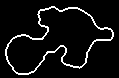

In [12]:
get_countour_mask(six_images)

In [13]:
get_contour_all(six_images)

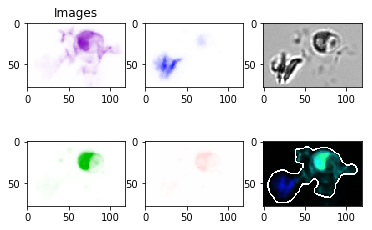

In [14]:
showimages(six_images)


# Now we will make a list of directories per folder


In [30]:
def getListDirectories(Path):
    x=[]
    for o in os.listdir(Path):
        if os.path.isdir(Path+o):
            x.append(o)
    return x
directories=getListDirectories(PATH)
directories.remove('labels')
directoriestemp=getListDirectories(PATH_TMP)
directoriestemp.remove('test')
directoriestemp.remove('train')
directories
classes=[d.split("_",1)[0] for d in directories]

### We need to generate new directories, with all the photos cropped. In each directory we will include all the croped imaged (photo number 3) of a class.

In [37]:
from tqdm import tqdm
import numpy as np
import cv2


In [56]:
PATH='TaraData/exportimg_160_20180423_0936/'
PATH_TRAIN='TaraData/train_group_prune/'
PATH_TEST='TaraData/test_group_prune/'
PATH_TMP='TaraData/tempFolders/'
PATH_TSV='TaraData/export_160_20180423_0931/'
PATH_MASK='TaraData/contour/'
PATH_MASK_TRAIN='TaraData/mask/train_group'
PATH_MASK_TEST='TaraData/mask/test_group'

In [39]:
im_width=367
im_lenght=170
def create_cropped_images(directories,path,dir_train,dir_test,dir_mask_train,dir_mask_test):
    for d in tqdm(directories):
        obj_class=d.split("_",1)[0]
        old_dir=os.path.join(path,d)
        new_dir_train=os.path.join(dir_train,obj_class)
        new_dir_test=os.path.join(dir_test,obj_class)
        new_dir_mast_train=os.path.join(dir_mask_train,obj_class)
        new_dir_mast_test=os.path.join(dir_mask_test,obj_class)
        
        if not os.path.exists(new_dir_train): os.makedirs(new_dir_train)
        if not os.path.exists(new_dir_test): os.makedirs(new_dir_test)
        if not os.path.exists(new_dir_mast_train): os.makedirs(new_dir_mast_train)
        if not os.path.exists(new_dir_mast_test): os.makedirs(new_dir_mast_test)
        dir_image_names=import_directory(old_dir,'gif')
        i=0
        
        for name_im in dir_image_names:
            i=i+1
            
            image_gif=Image.open(old_dir+'/'+name_im, mode='r')
            nframes = 0
            while image_gif:
                if 1<nframes<5: 
                    six_images=crop6(image_gif)
                    if ( np.random.rand() < 0.8): 
                        new_dir=new_dir_train
                        new_dir_mask=new_dir_mast_train
                    else:   
                        new_dir=new_dir_test
                        new_dir_mask=new_dir_mast_test
                    pil_image = six_images[4].convert("RGBA")
                    opencvImage = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
                    #mask=get_contour_all(six_images)
                    #opencvImagemask = cv2.cvtColor(np.array(mask), cv2.COLOR_RGB2BGR)
                    cv2.imwrite('%s/%s-%s.jpg' % (new_dir, name_im, nframes ),opencvImage)
                    #cv2.imwrite('%s/%s-%s.jpg' % (new_dir_mask, name_im, nframes ),opencvImagemask)
                    
                    
                    
                nframes += 1
                
                try:
                    image_gif.seek( nframes )
                except EOFError:
                    break;
            
            image_gif.close()


In [40]:
create_cropped_images(directories,PATH,PATH_TRAIN,PATH_TEST,PATH_MASK_TRAIN,PATH_MASK_TEST)    
#create_cropped_images(directoriestemp,PATH_TMP,PATH_TRAIN,PATH_TEST,PATH_MASK_TRAIN,PATH_MASK_TEST)   

100%|██████████| 156/156 [14:36<00:00,  5.62s/it]


# Mean and sd of the images
Now we need to calculate the mean and the sd of each of the foldes (train and test) to input the model.
It's preferable to input a dataset with 0 mean into a Deep Neural Network.

In [57]:
from skimage import io, img_as_float
import matplotlib.image as mpimg
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

im_width=367
im_height=170

def get_mean(directory):
    images = []
    i=0
    mean0=0
    mean1=0
    mean2=0
    arr=np.zeros((im_height,im_width,3),np.float)

    i = sum([len(files) for r, d, files in os.walk(directory)])
    
    for dirs in tqdm(os.listdir(directory)):
        for filename in os.listdir(os.path.join(directory,dirs)):    
            img = mpimg.imread(os.path.join(os.path.join(directory,dirs), filename))
            img = img_as_float(img)
            mean0= mean0 + np.mean(img[0])/i
            mean1= mean1 + np.mean(img[1])/i
            mean2= mean2 + np.mean(img[2])/i
          
    return np.array([mean0,mean1,mean2])



In [58]:

mean_train=get_mean(PATH_TRAIN)


100%|██████████| 18/18 [02:16<00:00,  7.61s/it]


In [59]:
print(mean_train)

[0.64604099 0.64627529 0.64668059]


In [60]:
mean_test=get_mean(PATH_TEST)

100%|██████████| 18/18 [00:34<00:00,  1.90s/it]


In [61]:
print(mean_test)

[0.64635304 0.64659761 0.64700603]
